# Fraud Detection in Electricity and Gas Consumption

The Tunisian Company of Electricity and Gas (STEG) is a public and a non-administrative company, it is responsible for delivering electricity and gas across Tunisia. The company suffered tremendous losses in the order of 200 million Tunisian Dinars due to fraudulent manipulations of meters by consumers.

Using the client’s billing history, the aim of the challenge is to detect and recognize clients involved in fraudulent activities.

The solution will enhance the company’s revenues and reduce the losses caused by such fraudulent activities.

# The Dataset

The following files are provided:

    - Client_train.csv : Client information in the train population
    - Invoice_train.csv: Clients invoice in the train set
    - Client_test.csv  : Client information for the test population
    - Invoice_test.csv : Clients invoice in the test set

As well as a sample output file:

    - SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the IDs must be correct. The column "target" is your prediction.

<!-- # # Marking Criteria
# 
# There are multiple ways one can tackle the problem. It is up to you to decide and motivate your decisions. You are not limited to using any specific methods or models.
# 
# Motivate all of your steps taken in completing the task at hand, this includes but is not limited to:
# - Exploring the data
# - Data augmentation
# - Preprocessing the data
# - Choosing the right machine learning model(s)
# - Tuning the model(s)
# - Performance assessment of the model(s) -->

# Variable definitions

### Client data:

    - Client_id: Unique id for client
    - District: District where the client is
    - Client_catg: Category client belongs to
    - Region: Area where the client is
    - Creation_date: Date client joined
    - Target: fraud:1 , not fraud: 0

### Invoice data

    - Client_id: Unique id for the client
    - Invoice_date: Date of the invoice
    - Tarif_type: Type of tax
    - Counter_number:
    - Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
    - Counter_code:
    - Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
    - Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
    - Consommation_level_1: Consumption_level_1
    - Consommation_level_2: Consumption_level_2
    - Consommation_level_3: Consumption_level_3
    - Consommation_level_4: Consumption_level_4
    - Old_index: Old index
    - New_index: New index
    - Months_number: Month number
    - Counter_type: Type of counter

# Marking Criteria

There are multiple ways one can tackle the problem. It is up to you to decide and motivate your decisions. You are not limited to using any specific methods or models.

Motivate all of your steps taken in completing the task at hand, this includes but is not limited to:
- Exploring the data
- Data augmentation
- Preprocessing the data
- Choosing the right machine learning model(s)
- Tuning the model(s)

- Performance assessment of the model(s)

Make sure to add your thoughts and motivations behind your decision making as well as the outcome thereof in markdown cells.

**Your commentary will be more valuable than the performance of the model itself.**

Remeber to label all graphs and keep your notebook neat.

# Make sure to include an Accuracy score of you final model on the test set.
You may choose any other additional criteria you want to evaluate you final model on.

In [7]:
import pandas as pd
import numpy as np

# Loading the data with pandas

In [8]:
client_train_data = pd.read_csv('archive/client_train.csv')
client_test_data  = pd.read_csv('archive/client_test.csv')
invoice_train_data = pd.read_csv('archive/invoice_train.csv')
invoice_test_data = pd.read_csv('archive/invoice_test.csv')

/Users/chuene/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
# shape of the data
print(client_train_data.shape, client_test_data.shape, invoice_train_data.shape, invoice_train_data.shape)

(135493, 6) (58069, 5) (4476749, 18) (4476749, 18)


In [99]:
client_train_data.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [ ]:
# 

In [97]:
# Checking the data types

print(client_train_data.info())
print(invoice_train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 18 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   conso

In [4]:
# Checking for null values

client_train_data.isna().any()
client_test_data.isna().any()
invoice_train_data.isna().any()
invoice_test_data.isna().any()

client_id               False
invoice_date            False
tarif_type              False
counter_number          False
counter_statue          False
counter_code            False
reading_remarque        False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
consommation_level_4    False
old_index               False
new_index               False
months_number           False
counter_type            False
dtype: bool

In [5]:
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#selected plotting functions
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Data preprocession

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le  = LabelEncoder()

In [12]:
invoice_train_data['counter_type_encoded'] = le.fit_transform(invoice_train_data['counter_type'])

In [13]:
invoice_train_data.drop(['counter_type'], axis=1)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type_encoded
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,0
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,0
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,0
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,0


<AxesSubplot:>

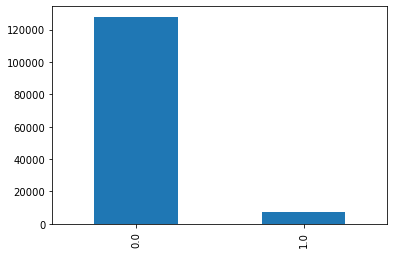

In [14]:
# Checking for balance dataset
client_train_data.target.value_counts().plot(kind='bar')

In [15]:
#
invoice_train_data['invoice_datetime'] =  pd.to_datetime(invoice_train_data['invoice_date']).apply(lambda x: x.toordinal())

In [16]:
invoice_train_data.drop(['invoice_date'], axis=1)

,client_id,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,counter_type_encoded,invoice_datetime
0,train_Client_0,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,0,735316
1,train_Client_0,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,0,734956
2,train_Client_0,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,0,735680
3,train_Client_0,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,0,735792
4,train_Client_0,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,0,736285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC,0,732177
4476745,train_Client_99998,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC,0,732299
4476746,train_Client_99999,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC,0,728927
4476747,train_Client_99999,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC,0,728807


In [19]:

def merge_client_and_invoice_train_info(client_data, invoice_data):
    
    
    
    merged_train_data = client_train_data.merge(
                                    invoice_train_data, left_on='client_id',
                                    right_on='client_id', how='left'
                                ).drop([['counter_type', 'client_id', 'invoice_date']], axis=1)

    #merged_train_data = merged_train_data.drop(['counter_type'], axis=1)

    #merged_train_data = merged_train_data.drop(['client_id'], axis=1)

    #merged_train_data = merged_train_data.drop(['invoice_date'], axis=1)

    merged_train_data['creation_datetime'] =  pd.to_datetime(
                                            merged_train_data['creation_date']
                                        ).apply(lambda x: x.toordinal()).drop(['creation_date'], axis=1)

    #merged_train_data = merged_train_data.drop(['creation_date'], axis=1)
    
    return merged_train_data

In [24]:
merged_train_data

,disrict,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type_encoded,invoice_datetime,creation_datetime
0,60,11,101,0.0,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,0,735316,728293
1,60,11,101,0.0,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,0,734956,728293
2,60,11,101,0.0,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,0,735680,728293
3,60,11,101,0.0,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,0,735792,728293
4,60,11,101,0.0,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,0,736285,728293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,11,101,0.0,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,0,732177,727919
4476745,60,11,101,0.0,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,0,732299,727919
4476746,60,11,101,0.0,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,0,728927,725055
4476747,60,11,101,0.0,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,0,728807,725055


In [25]:
X_train_merged_data = merged_train_data.drop(['target'], axis=1)

In [26]:
X_train_merged_data

,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type_encoded,invoice_datetime,creation_datetime
0,60,11,101,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,0,735316,728293
1,60,11,101,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,0,734956,728293
2,60,11,101,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,0,735680,728293
3,60,11,101,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,0,735792,728293
4,60,11,101,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,0,736285,728293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,11,101,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,0,732177,727919
4476745,60,11,101,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,0,732299,727919
4476746,60,11,101,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,0,728927,725055
4476747,60,11,101,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,0,728807,725055


In [27]:
y_train_merged_data = merged_train_data['target']

In [28]:
y_train_merged_data.unique()

array([0., 1.])

In [29]:
#X_train_merged_data['counter_statue'] = pd.to_numeric(X_train_merged_data['counter_statue'], errors='coerce')

In [30]:
X_train_merged_data['counter_statue'] = X_train_merged_data['counter_statue'].replace(['0', '5', '1', '4', 'A'], [0, 5, 1, 4, 0])

In [31]:
X_train_merged_data['counter_statue'].unique()

array([     0,      1,      5,      4,      3,      2,    769,    618,
       269375,     46,    420])

In [31]:
X_train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 19 columns):
 #   Column                Dtype
---  ------                -----
 0   disrict               int64
 1   client_catg           int64
 2   region                int64
 3   tarif_type            int64
 4   counter_number        int64
 5   counter_statue        int64
 6   counter_code          int64
 7   reading_remarque      int64
 8   counter_coefficient   int64
 9   consommation_level_1  int64
 10  consommation_level_2  int64
 11  consommation_level_3  int64
 12  consommation_level_4  int64
 13  old_index             int64
 14  new_index             int64
 15  months_number         int64
 16  counter_type_encoded  int64
 17  invoice_datetime      int64
 18  creation_datetime     int64
dtypes: int64(19)
memory usage: 683.1 MB


In [ ]:
invoice_test_data['counter_type_encoded'] = le.fit_transform(invoice_test_data['counter_type'])

In [53]:
invoice_test_data.drop(['counter_type'], axis=1)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type_encoded
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,0
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,0
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,0
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,0
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,0
1939726,test_Client_9999,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,0
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,0
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,0


In [54]:
invoice_test_data['invoice_datetime'] =  pd.to_datetime(invoice_test_data['invoice_date']).apply(lambda x: x.toordinal())

In [55]:
invoice_test_data.drop(['invoice_date'], axis=1)

,client_id,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,counter_type_encoded,invoice_datetime
0,test_Client_0,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC,0,736769
1,test_Client_0,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC,0,735313
2,test_Client_0,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC,0,735431
3,test_Client_0,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC,0,735792
4,test_Client_0,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC,0,736164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC,0,733842
1939726,test_Client_9999,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC,0,734211
1939727,test_Client_9999,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC,0,734840
1939728,test_Client_9999,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC,0,733589


In [71]:
client_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   disrict        58069 non-null  int64 
 1   client_id      58069 non-null  object
 2   client_catg    58069 non-null  int64 
 3   region         58069 non-null  int64 
 4   creation_date  58069 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [56]:
merged_test_data = client_test_data.merge(invoice_test_data, left_on='client_id', right_on='client_id', how='left')

In [ ]:
def merge_client_and_invoice_test_info(client_data, invoice_data):
    
    merged_test_data = client_test_data.merge(
                                invoice_test_data, left_on='client_id', 
                                right_on='client_id', how='left'
                                ).drop([['counter_type', 'client_id','invoice_date']], axis=1)
    
    #merged_test_data = merged_test_data.drop(['counter_type'], axis=1)
    #merged_test_data = merged_test_data.drop(['client_id'], axis=1)
    #merged_test_data = merged_test_data.drop(['invoice_date'], axis=1)
    
    merged_test_data['creation_datetime'] =  pd.to_datetime(
                                                merged_test_data['creation_date']
                                                ).apply(lambda x: x.toordinal()).drop(['creation_date'], axis=1)
    
    #merged_test_data = merged_test_data.drop(['creation_date'], axis=1)
    
    return merged_test_data

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(random_state = 14)
X_train, y_train = smote.fit_sample(X_train_merged_data, y_train_merged_data)

In [35]:
import matplotlib.pyplot as plt 

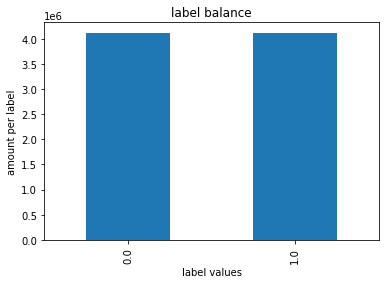

In [36]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
# Model Building

In [37]:
from xgboost import XGBClassifier

In [38]:
xgbc=XGBClassifier(random_state=14)

In [39]:
xgbc.fit(X_train, y_train)

[21:40:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=14,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [63]:
X_test = merged_test_data

In [72]:
y_pred = xgbc.predict_proba(X_test)

In [75]:
y_pred

array([[0.87673974, 0.12326027],
       [0.8568511 , 0.14314888],
       [0.55008495, 0.44991508],
       ...,
       [0.6862006 , 0.31379938],
       [0.63224363, 0.36775634],
       [0.81068075, 0.18931928]], dtype=float32)

In [78]:
preds = pd.DataFrame(y_pred)
preds

,0,1
0,0.876740,0.123260
1,0.856851,0.143149
2,0.550085,0.449915
3,0.691901,0.308099
4,0.699030,0.300970
...,...,...
1939725,0.632244,0.367756
1939726,0.641347,0.358653
1939727,0.686201,0.313799
1939728,0.632244,0.367756


In [81]:
merged_test_data1 = client_test_data.merge(invoice_test_data, left_on='client_id', right_on='client_id', how='left')

In [88]:
submission = pd.DataFrame({
        "client_id": merged_test_data1["client_id"],
        "target": preds[0]
    })

In [96]:
submission

,client_id,target
0,test_Client_0,0.876740
1,test_Client_0,0.856851
2,test_Client_0,0.550085
3,test_Client_0,0.691901
4,test_Client_0,0.699030
...,...,...
1939725,test_Client_9999,0.632244
1939726,test_Client_9999,0.641347
1939727,test_Client_9999,0.686201
1939728,test_Client_9999,0.632244


In [90]:
submission_file = pd.read_csv('archive/SampleSubmission (2).csv')

In [93]:
submission_file .client_id.unique()

array(['test_Client_0', 'test_Client_1', 'test_Client_10', ...,
       'test_Client_9997', 'test_Client_9998', 'test_Client_9999'],
      dtype=object)

In [103]:
submission_file

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046
...,...,...
58064,test_Client_9995,0.882548
58065,test_Client_9996,0.715918
58066,test_Client_9997,0.285178
58067,test_Client_9998,0.154661


In [66]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
'''

1. Load in the data
2. Check for the size of the data and look at the data
3. Check for the data types
4. Check for the null values or values that doesn't make sense
5. 


1. Convert timestamp to datetime
2. Convert categorical data to numerical data
3. Merge the client data and the invoice data
4. Check how you merged 



1. Check for correlation and time series
2. Check if the have a balance dataset: if not balance the data


1. Build a model
2. Perform hypeparameter tuning 


'''